In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_utils import create_date_df

# MA(2) 모델의 모사
n = 100 # 데이터 포인트 수
ma_params = [0.4, -0.2] # 이동평균 계수
residuals = np.random.normal(0, 1, n) # 잔차 생성

data = [0, 0]
for i in range(2, n):
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] + residuals[i])
    # MA 모델은 자신의 이전 값들의 오차항의 연산 결과로 값이 예측된다는 모델
    # 따라서 차수가 2이므로 이전 값 2개를 가져오고, 각 값들의 잔차와 이동평균 계수를 곱하여 현재 값을 예측
    # 자기 자신의 예측값에 노이즈를 더해서 예측값 완성

df = create_date_df(n, data)
df = df.set_index('Date')
print(df.head(5))

               Value
Date                
2023-01-01  0.000000
2023-01-02  0.000000
2023-01-03 -0.530463
2023-01-04 -0.528165
2023-01-05  0.149769


In [5]:
from statsmodels.tsa.arima.model import ARIMA 

# MA(2) 모델 : ARIMA에서 AR(0) I(0)을 취하면 결국 두 모델을 사용하지 않게 됨
model = ARIMA(df['Value'], order=(0, 0, 2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -127.941
Date:                Fri, 18 Aug 2023   AIC                            263.881
Time:                        14:36:21   BIC                            274.302
Sample:                    01-01-2023   HQIC                           268.099
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2617      0.085     -3.063      0.002      -0.429      -0.094
ma.L1          0.3054      0.087      3.505      0.000       0.135       0.476
ma.L2         -0.3214      0.086     -3.719      0.0

C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


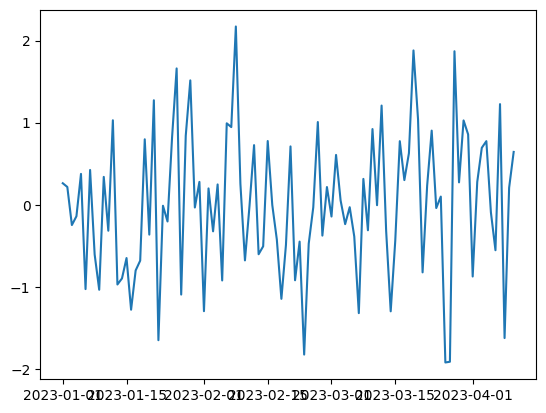

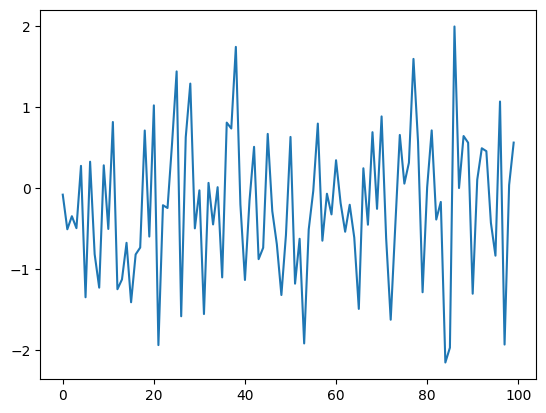

In [6]:
plt.plot(results.resid)
plt.show()
plt.plot(residuals)
plt.show()